In [ ]:
'''3 arquivos estão sendo postados aqui: cadastro.csv; preço da gasolina.csv; salario_professioes.csv.
Diante desses 3 arquivos, o trabalho deve responder as seguintes perguntas:

Qual a idade média das pessoas no cadastro ?
Quantos homens tem no cadastro ?
Quantas mulheres tem no cadastro ?
Qual a idade média dos homens e das mulheres ?
Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro ?
Mostre a Média Salarial do cadastro ?
Quem tem o maior salário ?
Tirando desempregado quem recebe menos ?
Quantas pessoas gostam de caminhar no final de semana ?
Crie um gráfico mostrando entre a relação de escolaridade e quem pratica esporte ?
Crie um mapa de calor ?
Mostre de forma gráfica a distribuição de estados do cadastro ?'''

In [228]:
import pandas as pd

df = pd.read_csv('cadastro - cadastro.csv')
df.head()

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior
3,João,Aparecido,1950,m,Monte Alto,Gerente de Projeto,3,Viuvo,2,Nã faço nada,NaN,-,NaN,sim,Ensino Superior
4,Marta,da Silva,1983,f,São Caetano,Auxiliar de Enfermagem,2,Solteira,0,caminhar,sim,crossfit,4.0,não,Ensimo Tecnico


In [238]:
#Qual a idade média das pessoas no cadastro?
cadastro_df = pd.read_csv('cadastro - cadastro.csv')
idade_df = cadastro_df[["ano_nascimento"]].mean() 
print('A Média das Pessoas com base no', round(2020 - idade_df))



A Média das Pessoas com base no ano_nascimento    33.0
dtype: float64


In [239]:
#Quantos homens tem no cadastro?
novo_cadastro_df = cadastro_df[['sexo', 'nome']].loc[cadastro_df.sexo == 'm'].replace('m','Homens').groupby('sexo').count()
novo_cadastro_df

,nome
sexo,
Homens,16


In [240]:
#Quantas mulheres tem no cadastro?
novo_cadastro_df = cadastro_df[['sexo', 'nome']].loc[cadastro_df.sexo == 'f'].replace('f','Mulheres').groupby('sexo').count()
novo_cadastro_df

,nome
sexo,
Mulheres,14


In [241]:
#Qual a idade média dos homens e das mulheres ?
f_idade_df = cadastro_df[["ano_nascimento"]].loc[cadastro_df.sexo == 'f'].mean()
m_idade_df = cadastro_df[["ano_nascimento"]].loc[cadastro_df.sexo == 'm'].mean()
print('A Média das Mulheres com base no', round(2020 - f_idade_df))
print('A Média dos Homens com base no', round(2020 - m_idade_df))

A Média das Mulheres com base no ano_nascimento    34.0
dtype: float64
A Média dos Homens com base no ano_nascimento    32.0
dtype: float64


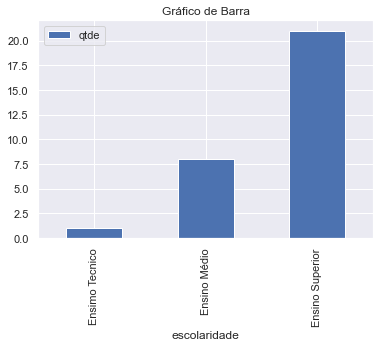

In [242]:
#Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro ?

df = pd.read_csv('cadastro - cadastro.csv')
cadastro_df = df[['escolaridade']]

string_nova = cadastro_df.replace('ensino superior', 'Ensino Superior').replace('ensino médio','Ensino Médio').replace('ensino Médio','Ensino Médio').replace('Ensimo Técnico','Ensino Técnico')
string_nova

string_nova['qtde'] = 1

string_nova[['escolaridade','qtde']].groupby('escolaridade').sum().plot(kind='bar' , title = 'Gráfico de Barra')

In [243]:
#Mostre a Média Salarial do cadastro ?
cad_df = pd.read_csv('cadastro - cadastro.csv')
sal_df = pd.read_csv('salario.csv')

novo_sal_df = sal_df.rename(columns={"Profissões": "profissão"}).rename(columns={"salaior +3 anos": "salário superior a 3 anos"})

s_sal_df = novo_sal_df[['profissão','salario até 3 anos']]

n_sal_df = novo_sal_df[['profissão','salário superior a 3 anos']]

novo_cad_df = cad_df[['nome','profissão']]

print('A média salarial do',round(novo_cad_df.merge(s_sal_df, left_on='profissão', right_on='profissão').mean()))

print('A média salarial do',round(novo_cad_df.merge(n_sal_df, left_on='profissão', right_on='profissão').mean(),2))



A média salarial do salario até 3 anos    3486.0
dtype: float64
A média salarial do salário superior a 3 anos    6103.45
dtype: float64


In [246]:
#Quem tem o maior salário ?
cad_df = pd.read_csv('cadastro - cadastro.csv')
sal_df = pd.read_csv('salario.csv')

novo_sal_df = sal_df.rename(columns={"Profissões": "profissão"}).rename(columns={"salaior +3 anos": "salario_superior_3_anos"}).rename(columns={"salario até 3 anos": "salario_ate_3_anos"})

s_sal_df = novo_sal_df[['profissão','salario_ate_3_anos']]

n_sal_df = novo_sal_df[['profissão','salario_superior_3_anos']]

novo_cad_df = cad_df[['nome','profissão']]


max_ate3_df = novo_cad_df.merge(s_sal_df, left_on='profissão', right_on='profissão')
max_mais3_df = novo_cad_df.merge(n_sal_df, left_on='profissão', right_on='profissão')

print('O maior salário até 3 anos é de :',max_ate3_df['salario_ate_3_anos'].max())

max_ate3_df.loc[(max_ate3_df.salario_ate_3_anos == 12000)]


O maior salário até 3 anos é de : 12000


,nome,profissão,salario_ate_3_anos
9,Mirtes,Médica,12000


In [247]:
print('O maior salário superior à 3 anos é de :',max_mais3_df['salario_superior_3_anos'].max())
max_mais3_df.loc[max_mais3_df.salario_superior_3_anos == 20000]

O maior salário superior à 3 anos é de : 20000


,nome,profissão,salario_superior_3_anos
9,Mirtes,Médica,20000


In [248]:
cad_df = pd.read_csv('cadastro - cadastro.csv')
sal_df = pd.read_csv('salario.csv')

novo_sal_df = sal_df.rename(columns={"Profissões": "profissão"}).rename(columns={"salaior +3 anos": "salario_superior_3_anos"}).rename(columns={"salario até 3 anos": "salario_ate_3_anos"})

filtro  = novo_sal_df['salario_ate_3_anos'] > 1
minimo_df = novo_sal_df[filtro]
minimo_df
s_sal_df = minimo_df[['profissão','salario_ate_3_anos']]

n_sal_df = minimo_df[['profissão','salario_superior_3_anos']]

minimo_df = cad_df[['nome','profissão']]


min_ate3_df = minimo_df.merge(s_sal_df, left_on='profissão', right_on='profissão')
min_mais3_df = minimo_df.merge(n_sal_df, left_on='profissão', right_on='profissão')

print('O menor salário até 3 anos é de :',min_ate3_df['salario_ate_3_anos'].min())
min_ate3_df.loc[min_ate3_df.salario_ate_3_anos == 900]

O menor salário até 3 anos é de : 900


,nome,profissão,salario_ate_3_anos
4,Vilma,caixa de mercado,900


In [249]:
print('O menor salário superior a 3 anos é de :',min_mais3_df['salario_superior_3_anos'].min())
min_mais3_df.loc[min_mais3_df.salario_superior_3_anos == 1200]

O menor salário superior a 3 anos é de : 1200


,nome,profissão,salario_superior_3_anos
1,Maria,dona de casa,1200
4,Vilma,caixa de mercado,1200


In [250]:
#Quantas pessoas gostam de caminhar no final de semana ?

with open ("cadastro - cadastro.csv","r", encoding = 'utf-8') as arq:
    ocorrencias = arq.read().count('caminhar')
print('Existem' ,ocorrencias, 'pessoas que gostam de "caminhar", são elas:')

with open("cadastro - cadastro.csv","r", encoding = 'utf-8') as arq:
    for f in arq.readlines():
        if(f.find('caminhar')>-1):
            print(f)

Existem 4 pessoas que gostam de "caminhar", são elas:
Marta,da Silva,1983,f,São Caetano,Auxiliar de Enfermagem,2,Solteira,0,caminhar,sim,crossfit,4,não,Ensimo Tecnico

Marcela,Santos,1987,f,Pernanbuco,Não informado,0,Viuvo,0,caminhar,não,-,0,sim,Ensino Médio

Patricia,Alburquerque,1982,f,Santa Catarina,Professora,5,Casada,2,"caminhar, ficar com os filhos",sim,zumba,2,sim,ensino superior

Matias,do Campo,1992,m,São Paulo,Gerente Financeiro,1,Divorciada,1,"caminhar, ler livros e ficar com o filho",sim,crossfit,3,sim,ensino superior



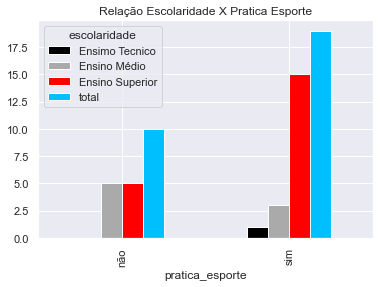

In [251]:
#Crie um gráfico mostrando entre a relação de escolaridade e quem pratica esporte ?
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('cadastro - cadastro.csv')
cadastro_df = df[['escolaridade','pratica_esporte']]

string_nova = cadastro_df.replace('ensino superior', 'Ensino Superior').replace('ensino médio','Ensino Médio').replace('ensino Médio','Ensino Médio').replace('Ensimo Técnico','Ensino Técnico').replace('NaN','não')

crosstab_vg = pd.crosstab(string_nova['pratica_esporte'],string_nova['escolaridade'])

crosstab_vg['total'] = crosstab_vg.sum(axis=1)
crosstab_vg.plot(kind='bar' , title = 'Relação Escolaridade X Pratica Esporte', color = ['#000000','#AAAAAA','#FF0000','#00BFFF'])





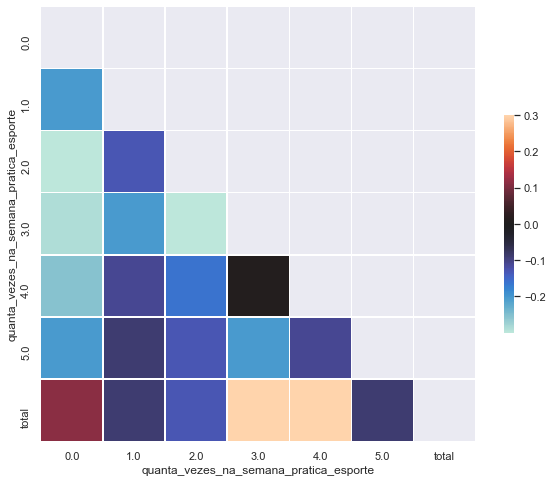

In [252]:
#Crie um mapa de calor?
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('cadastro - cadastro.csv')

mapa_df = pd.crosstab(df['nome'],df['quanta_vezes_na_semana_pratica_esporte'])

mapa_df['total'] = mapa_df.sum(axis=1)

corr = mapa_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(10, 8))

sb.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<ipython-input-253-6803f1d82fe5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cadastro_df['qtde'] = 1


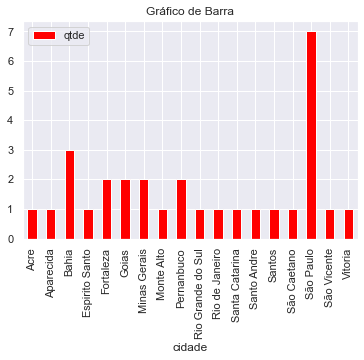

In [253]:
#Mostre de forma gráfica a distribuição de estados do cadastro ?

df = pd.read_csv('cadastro - cadastro.csv')
cadastro_df = df[['cidade']]

cadastro_df['qtde'] = 1

cadastro_df[['qtde','cidade']].groupby('cidade').sum().plot(kind='bar' , title = 'Gráfico de Barra', color = "red")